In [1]:
#!/usr/bin/env python
import sys,os
import numpy as np
import pylab as py
#from tools import load 
import pandas as pd
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Activation,Dropout,Input, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# from tools import load,load2,save,checkdir,lprint
#--matplotlib
import matplotlib
import matplotlib.pyplot as plt
import pylab as py

Using TensorFlow backend.


In [2]:
# load data
ops_p = np.load("./data/obs_p.npy")
ops_n = np.load("./data/obs_n.npy")
par = np.load("./data/par.npy") # this is the output
X = np.load('./data/X.npy')
Q2 = np.load('./data/Q2.npy')

In [3]:
ops_p.shape, ops_n.shape, X.shape, Q2.shape, par.shape

((100, 101), (100, 101), (101,), (101,), (100, 10))

In [4]:
# our input to the model is cross section which is the compination of ops_p and ops_n
cross_section = np.concatenate((ops_p, ops_n), axis = 1)
cross_section[0]

array([2.62739496, 2.86254862, 2.79843463, 2.73972796, 3.10878211,
       3.04933402, 2.99471389, 2.9442627 , 2.8974438 , 3.35659226,
       3.30344547, 3.25444417, 3.20903486, 3.16676522, 3.12726121,
       3.09021019, 3.58513279, 3.54019841, 3.49861805, 3.45995439,
       3.42384878, 3.39000366, 3.3581695 , 3.32813513, 3.29972031,
       3.74999402, 3.71536454, 3.6831932 , 3.65316802, 3.62503212,
       3.59857158, 3.57360641, 3.54998376, 3.52757277, 3.50626056,
       3.48594912, 3.75762651, 3.73516719, 3.71420144, 3.69454633,
       3.67605045, 3.65858711, 3.64204921, 3.62634543, 3.61139726,
       3.59713674, 3.58350463, 3.57044898, 3.55792403, 3.41611362,
       3.40619255, 3.39685002, 3.38802057, 3.37964942, 3.37169021,
       3.36410333, 3.35685472, 3.34991481, 3.34325782, 3.33686107,
       3.33070454, 3.32477049, 3.31904304, 3.31350802, 2.37396808,
       2.37246489, 2.37097214, 2.36949452, 2.36803518, 2.36659621,
       2.36517894, 2.36378415, 2.36241224, 2.36106331, 2.35973

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cross_section, par, test_size= 0.1, random_state=0)

In [6]:
def model(X_train, y_train, EPOCHS, BATCH_SIZE, lr):
    input=Input(shape= X_train[0].shape)
    x=Dense(100, activation='relu')(input)
    x = Dropout(0.01)(x)
    x=Dense(100, activation='relu')(x)
    x = Dropout(0.01)(x)
    x=Dense(100, activation='relu')(x)
    x = Dropout(0.01)(x)
    output=Dense(10)(x)
    model=Model(input,output)
    model.summary()
    model_optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001) 
    model.compile(optimizer=model_optimizer,loss='mean_squared_error')
    history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, verbose=1)
    return model, history

In [7]:
model, history = model(X_train, y_train, EPOCHS = 300, BATCH_SIZE = 1, lr = 0.0001)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 202)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_______________________

72/72 [==============================] - 0s 2ms/step - loss: 4.1890 - val_loss: 2.8873
Epoch 117/300
72/72 [==============================] - 0s 3ms/step - loss: 4.6341 - val_loss: 3.1174
Epoch 118/300
72/72 [==============================] - 0s 3ms/step - loss: 3.5798 - val_loss: 3.1669
Epoch 119/300
72/72 [==============================] - 0s 2ms/step - loss: 4.7037 - val_loss: 2.9311
Epoch 120/300
72/72 [==============================] - 0s 2ms/step - loss: 4.0807 - val_loss: 2.5942
Epoch 121/300
72/72 [==============================] - 0s 2ms/step - loss: 2.8807 - val_loss: 2.6996
Epoch 122/300
72/72 [==============================] - 0s 2ms/step - loss: 3.0395 - val_loss: 2.7634
Epoch 123/300
72/72 [==============================] - 0s 2ms/step - loss: 3.5464 - val_loss: 2.8578
Epoch 124/300
72/72 [==============================] - 0s 3ms/step - loss: 2.7360 - val_loss: 2.6841
Epoch 125/300
72/72 [==============================] - 0s 2ms/step - loss: 3.4323 - val_loss: 2.6753
Epoc

72/72 [==============================] - 0s 2ms/step - loss: 1.6375 - val_loss: 1.9444
Epoch 198/300
72/72 [==============================] - 0s 2ms/step - loss: 1.8454 - val_loss: 1.8795
Epoch 199/300
72/72 [==============================] - 0s 2ms/step - loss: 1.6249 - val_loss: 1.9059
Epoch 200/300
72/72 [==============================] - 0s 2ms/step - loss: 2.0576 - val_loss: 1.9075
Epoch 201/300
72/72 [==============================] - 0s 2ms/step - loss: 1.9082 - val_loss: 2.1703
Epoch 202/300
72/72 [==============================] - 0s 2ms/step - loss: 1.6966 - val_loss: 2.1125
Epoch 203/300
72/72 [==============================] - 0s 2ms/step - loss: 1.6992 - val_loss: 1.7362
Epoch 204/300
72/72 [==============================] - 0s 2ms/step - loss: 1.5553 - val_loss: 1.9258
Epoch 205/300
72/72 [==============================] - 0s 2ms/step - loss: 1.4996 - val_loss: 2.1640
Epoch 206/300
72/72 [==============================] - 0s 2ms/step - loss: 1.6818 - val_loss: 2.3607
Epoc

In [65]:
#model.save('my_model.h5')  

## Now we load the model and do the prediction
## so basically this is the new trained model my_model.h5

In [11]:
from keras.models import load_model
model = load_model('./model/my_model.h5')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











In [8]:
result = model.predict(X_test)

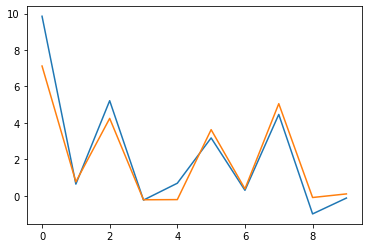

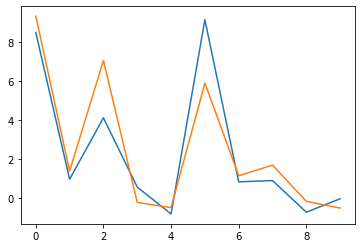

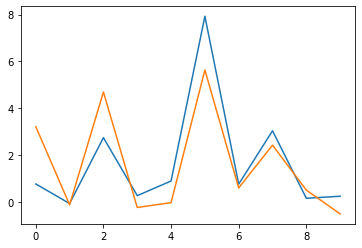

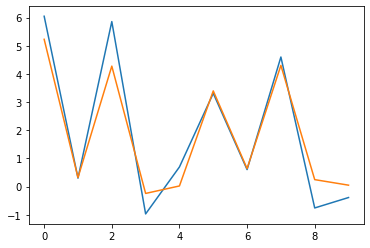

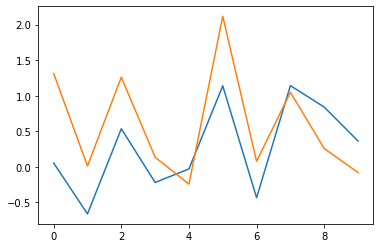

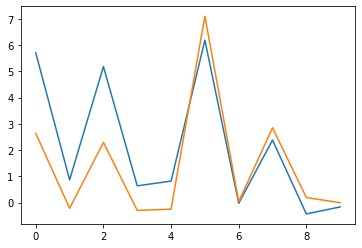

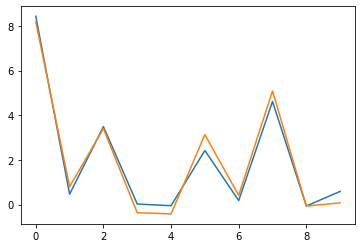

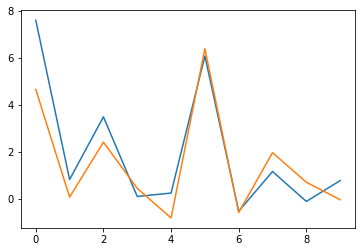

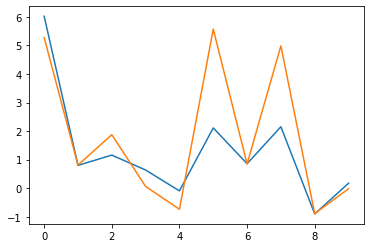

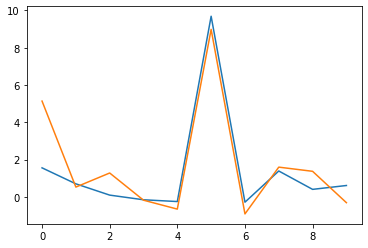

In [9]:
# plot true vs pred
for i in range(10):    
    plt.plot(y_test[i])
    plt.plot(result[i])
    plt.show()

### Now you can do the predication with adding noise.

### Also remember when we select points from X and Q2 plot, we will pick the corresponding elements in ops_p and ops_n then we add noise on those points then we concatenate them and then feed the concatenated array to the model to do the prediction. 

In [23]:
fname = 'test_backward'
par = np.load('data/%s-par.npy'%fname)
par.shape

(1000, 10)

### performing to get the pdf

In [11]:
result.shape

(10, 10)

In [18]:
#!/usr/bin/env python
import sys,os
import numpy as np
from scipy.special import gamma

Q02=4.0
lam2=0.2**2
pu=np.ones(10)
pd=np.ones(10)
pu[5:]*=0.1
pd[5:]*=0.1

pmin=np.zeros(5)
pmax=np.zeros(5)
pmin[0],pmax[0]= 0,10 # N
pmin[1],pmax[1]=-1,1 # a
pmin[2],pmax[2]= 0,6 # a
pmin[3],pmax[3]=-1,1 # a
pmin[4],pmax[4]=-1,1 # a

def get_s(Q2):
    return np.log(np.log(Q2/lam2)/np.log(Q02/lam2))

def set_params(par):
    pu[:5]=par[:5]
    pd[:5]=par[5:]

def _get_shape(x,p):
    return p[0]*x**p[1]*(1-x)**p[2]*(1+p[3]*x+p[4]*x**2)

def get_shape(x,p,s):
    N=p[0] + p[5] * s
    a=p[1] + p[6] * s
    b=p[2] + p[7] * s
    c=p[3] + p[8] * s
    d=p[4] + p[9] * s
    return _get_shape(x,[N,a,b,c,d])

def get_pdf(x,Q2,flav):
    s=get_s(Q2)
    if flav=='u': return get_shape(x,pu,s)
    if flav=='d': return get_shape(x,pd,s)

In [36]:
x = np.linspace(0.01,0.99,100)
Q2=4.0
u=[]
d=[]
for i in range(par.shape[0]):
    set_params(par[i])
    u.append(get_pdf(x,Q2,'u'))
    d.append(get_pdf(x,Q2,'d'))
u = np.array(u)
d = np.array(d)
print('Up data shape : ',u.shape)
print('Down data Shape : ',d.shape)

Up data shape :  (1000, 100)
Down data Shape :  (1000, 100)


plotting the pdf-upper and pdf-down

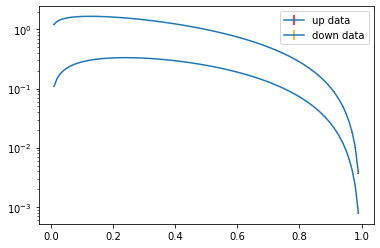

In [39]:
plt.errorbar(x, u.mean(axis=0), yerr=u.std(axis = 0)*5, fmt='-', ecolor='red')
plt.errorbar(x, d.mean(axis=0), yerr=d.std(axis = 0)*5, fmt='-', ecolor='orange')
#plt.plot(u)
#plt.plot(d)
plt.legend(["up data", "down data"])
plt.yscale('log')
plt.show()

### --- Heramb

Exploring the Data


In [7]:
#ops_p.shape, ops_n.shape, X.shape, Q2.shape, par.shape

import pandas as pd

df = pd.DataFrame(data=X,columns=['X'])
df['Q2'] = Q2
df['ops_p'] = ops_p[0,:]   #--- currently taking only one sample
df['ops_n'] = ops_n[0,:]   #--- currently taking only one sample
df['co-ord'] = list(zip(X,Q2))
df.head()

,X,Q2,ops_p,ops_n,co-ord
0,0.012055,1.000000,2.627395,0.727704,"(0.012055362337673993, 1.0)"
1,0.019467,1.000000,2.862549,0.816804,"(0.019466967101596316, 1.0)"
2,0.019467,1.260221,2.798435,0.799198,"(0.019466967101596316, 1.260220615891982)"
3,0.019467,1.588156,2.739728,0.783056,"(0.019466967101596316, 1.5881560007191666)"
4,0.031435,1.000000,3.108782,0.920222,"(0.031435206800076304, 1.0)"


In [8]:
ops_p.shape

(100, 101)

In [9]:
df.loc[df['co-ord'] == (0.012055362337673993, 1.0),'ops_p']

0    2.627395
Name: ops_p, dtype: float64

In [10]:
df['ops_p'][0]

2.6273949645136696

In [13]:
def calculate_xsec(data):
    return np.concatenate((data['ops_p'], data['ops_n']))

In [14]:
xsec = calculate_xsec(df)

In [18]:
len(xsec)

202

In [21]:
num_features = 202
len(np.random.rand(num_features,))

202

In [23]:
len(df['ops_p'])

101

In [28]:
# Load .h5 keras/tensorflow model

def load_model(model):

    model = tf.keras.models.load_model('mldata/%s.h5'%model) 
    return model

def backwardPredict(fname, model):
# load xsec file
    xsec = X_test
    ml = load_model(model) 


    # add 0.05 noise 
    predList = addNoise(xsec, 0.05, 202) 

    # make the prediction
    pred = ml.predict(predList)
    #pred = par_scaler.inverse_transform(pred)
    np.save('data/%s-par.npy'%fname, pred)
    return pred

def addNoise(data, alpha, num_features):

    predList = []
    for i in range(1000):
        predList.append(data + (alpha * np.random.rand(num_features,)))
    predList = np.array(predList)

    return predList

if __name__=='__main__':

    fname = 'test_backward'
    modelname = 'model_1'

    pred = backwardPredict(fname, modelname)
    print("\nSaving predicted parameters file in example1/data folder ...")

ValueError: Error when checking input: expected input_1 to have 2 dimensions, but got array with shape (1000, 10, 202)

In [29]:
X_test.shape

(10, 202)

In [ ]:
x = np.arange(10)
plt.errorbar(x, pred.mean(axis=0), yerr=pred.std(axis = 0)*80, fmt='-', ecolor='orange')
plt.xlabel("Parameters")
plt.title("Predicted parameters with 0.05 noise")
plt.ylabel("Normalized values")
plt.legend(["pred mean"])